|![HatecrimeImage](https://sdmntprwestus2.oaiusercontent.com/files/00000000-dcd8-61f8-98a6-a1652bae6ca1/raw?se=2025-07-12T15%3A57%3A56Z&sp=r&sv=2024-08-04&sr=b&scid=a3c15307-d634-50a9-b227-7458e56783bb&skoid=add8ee7d-5fc7-451e-b06e-a82b2276cf62&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-07-12T12%3A27%3A39Z&ske=2025-07-13T12%3A27%3A39Z&sks=b&skv=2024-08-04&sig=Z1NsVFH1P7MPdP56/Ykku4ykfELDTtgXnXCa4Vn8PKk%3D) 

# **Machine Learning: Hate Crimes in the US Based on Bias**  
### **Summer 2025 Data Science Final Project**  
**Jake Samuel**  

#### Introduction

Throughout the United States, the overall prevalence of hate crimes is a serious concern. This project applies machine learning to analyze the Hate Crime Statistics Data Collection from the Uniform Crime Reporting (UCR) Program to understand crimes committed motivated by prejudice based on race, religion, disability, sexual orientation, ethnicity, gender, or gender identity. This data, which includes reports from city, county, college and university, state, tribal, and federal agencies, allows us to better understand the nature of these crimes and the motivations behind them. There are many different hate-crime biases, such as anti-Indian, anti-Native American, anti-Black or African American, and anti-Hispanic—crimes based on race, ethnicity, and ancestry. Additionally, there are religion-based biases, such as anti-Eastern Orthodox, anti-Hindu, and anti-Sikh. 

Throughout this project and analysis, I aim to find data that answers the following questions: How has hate-crime rates have evolved in the United States over the past two decades, and which bias categories and contextual factors are most strongly linked to higher incident rates? This is important because analyzing the trend of hate-crimes, we can see if they have been increasing, staying the same, or decreasing and whether specific events are causing that trend. Also, not all bias motivations and situational factors are equally prevalent or harmful, so pinpointing which categories see higher incident rates can allow policymakers and law enforcement agencies to prioritize resources where they are needed most.  



# FBI Hate Crimes Data

The FBI’s hate crime dataset comprises data voluntarily submitted by thousands of law enforcement agencies across the United States. These agencies report incidents to the Uniform Crime Reporting (UCR) Program.  The hate crimes are motivated by bias related to race, religion, disability, sexual orientation, ethnicity, gender, or gender identity.



## Hate Crime Biases

According to FBI Hate Crime, hate crime biases are categorized into sub-sections as follows:

* **Race/Ethnicity/Ancestry**
    * Anti-Native American or Alaska Native
    * Anti-Arab
    * Anti-Asian
    * Anti-Black or African American
    * Anti-Hispanic or Latino
    * Anti-Multiple Races, Group
    * Anti-Native Hawaiian or Other Pacific Islander
    * Anti-Other Race/Ethnicity/Ancestry
    * Anti-White
* **Religion**
    * Anti-Buddhist
    * Anti-Catholic
    * Anti-Eastern Orthodox (Russian, Greek, Other)
    * Anti-Hindu
    * Anti-Islamic
    * Anti-Jehovah’s Witness
    * Anti-Jewish
    * Anti-Mormon
    * Anti-Multiple Religions, Group
    * Anti-Other Christian
    * Anti-Other Religion
    * Anti-Protestant
    * Anti-Sikh
    * Anti-Atheism/Agnosticism, etc.
* **Sexual Orientation**
    * Anti-Bisexual
    * Anti-Gay (Male)
    * Anti-Heterosexual
    * Anti-Lesbian
    * Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)
* **Differing Ability**
    * Disability
    * Anti-Physical Disability
* **Gender**
    * Anti-Male
    * Anti-Female
* **Gender Identity**
    * Anti-Transgender
    * Anti-Gender Non-Conforming 


## Resources

The following resources are used:
* https://www.fbi.gov/how-we-can-help-you/more-fbi-services-and-information/ucr/hate-crime
* https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/downloads
* https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/docApi
* https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/explorer/crime/hate-crime
* https://api.data.gov/signup/ - Request API key

# Data Curation
### Dataset for Total Hate Crimes 
The `Hate Crime Biases` detailed above can be broken down to into each year between 2000 and 2023 to understand the trend of these hate crimes. This information will provide a high-level understanding of the dynamics of the crimes.   

This data portrays the trend of the total incident count of hate-crimes in the United States. 

The following service endpoint is used to assess this information: 

`https://api.usa.gov/crime/fbi/cde/hate-crime/national?type=counts&from=01-2000&to=01-2023&API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv`

### Dataset for Hate Crime Motivation & Location Type 
To understand why and where hate crimes occur, I pulled together two datasets from the FBI's Hate Crime API. Using this dataset, I can extract information that portrays the bias motivations and location types where hate crime incidents are the highest.  

The following service endpoint is used to assess this information: 

`https://api.usa.gov/crime/fbi/cde/hate-crime/national?type=totals&from=01-2000&to=01-2023&API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv`


### 1. Request from API

Use the API endpoint to make the request and validate the response status code.

In [157]:
import pandas as pd 
import requests 

# Define the API endpoint for the first dataset 
request_from = "01-2000"
request_to = "01-2023"
url = f"https://api.usa.gov/crime/fbi/cde/hate-crime/national?type=counts&from={request_from}&to={request_to}&API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv" 

# Make the GET request
response = requests.get(url) 

# Validate the response status code for the first dataset
if response.status_code == 200:
    print ("Request one was successful")
else:
    print (f"Request failed with status code: {response.status_code}")

url_two = "https://api.usa.gov/crime/fbi/cde/hate-crime/national?type=totals&from=01-2000&to=01-2023&API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv"

response_two = requests.get(url_two) 
# Validate the response status code for the second dataset
if response_two.status_code == 200:
    print ("Request two was successful")
else:
    print (f"Request failed with status code: {response.status_code}")


Request one was successful
Request two was successful


## 2. Extract Data
Extract the actual incident count from the response. Then, process the data, converting it to a timeseries, making it ready for visualization and analysis. I also extract the data of hate crime bias motivations and hate crime incidents by location.

In [158]:

# Convert response to JSON
data = response.json()

###################################################################
# Get data for trend of National Hate Crime Incidents
###################################################################

# Create a DataFrame and turn the 'actuals' dict into a time series 
df = pd.DataFrame(data)
# Get the U.S national incident counts 
inc_dict = df.loc['United States Incidents', 'actuals']
ts = pd.Series(inc_dict)
# Convert the monthly string ("01-2000") into actual timestamps
ts.index = pd.to_datetime(ts.index, format='%m-%Y')
ts = ts.sort_index()

###################################################################
# Get data for distribution of Hate Crime Bias Motivations
###################################################################
    
data= response_two.json()

df = pd.DataFrame(data)
bias_dict = df.loc['bias_category', 'incident_section']

bias_series = pd.Series(bias_dict)

###################################################################
# Get data for Hate Crime Incidents by Location
###################################################################
loc_dict = df.loc['location_type', 'bias_section']
loc_series = (
    pd.Series(loc_dict)
        .astype(int)
        .sort_values(ascending=False)
)


Now that all of the information required have been created, I use `matplotlib` and `seaborn` modules to plot the data points. 


# Exploratory Data Analysis
### **Total Hate Crime Incidents in the United States**  
This dataset contained many features but I located the main features which are 'United States Incidents' and the year of which it occurred. These were the only features displayed in the graph. There was an entry for every month of every year and the years span from 2000-2023. To be specific, there are 277 entries of Hate-Crime Incidents from January 2000 to January 2023. Since there are only two columns, time and count, there is no feature that is over-represented. However, there are a few outliers as shown in the graph including September 2001, where there were 1966 reported incidents and June 2020, where there were 1444 reported incidents. 

**Hypotheses**  
Null Hypothesis -  H0: β1 = 0 (where β1 is the slope is incident count / year; this means there is no linear increase in incidents over time). 

Alternative Hyptothesis - Ha: β1 > 0 (incidents increase with year) 

I will use the following significance level: $\alpha$ = .05

**Primary Analysis Technique**

I will use a regression line to determine the slope. This method is helpful in this case as it determines the relationship between time and the number of incidents. 





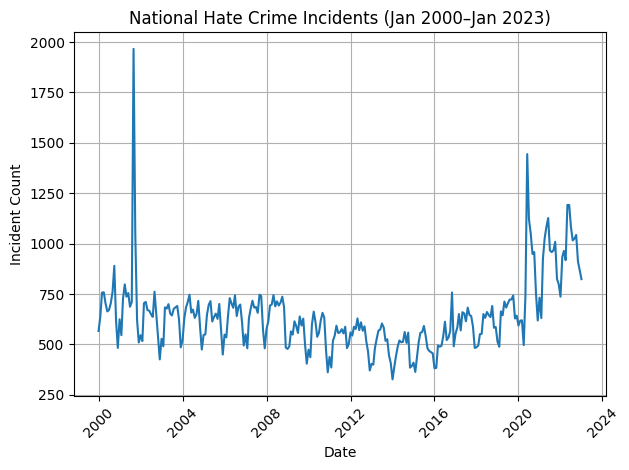

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
plt.plot(ts.index, ts.values)
plt.title('National Hate Crime Incidents (Jan 2000–Jan 2023)')
plt.xlabel('Date')
plt.ylabel('Incident Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**This plot shows the trend of hate crime incidents from 2000 to 2023. Now, I will use a linear regression model to determine the direction of that trend, measuring how incident counts have increased or decreased over time.** 

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# 1) Prepare X (time) and y (incident counts)
#    Convert each timestamp to an ordinal integer
X = np.array([dt.toordinal() for dt in ts.index]).reshape(-1, 1)
y = ts.values

# 2) Split into train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) Fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# 4) Predict on the test set
y_pred = lr.predict(X_test)

# 5) Evaluate performance
print(f"R² score: {r2_score(y_test, y_pred):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.1f} incidents")

# 6) Inspect slope (trend per day)
slope = lr.coef_[0]
print(f"Slope = {slope:.4f} incidents per day")

R² score: 0.059
Mean Absolute Error: 120.3 incidents
Slope = 0.0085 incidents per day


The positive slope of the linear regression model confirms a small but consistent upward trend of hate crime incidents. Now, I will use the ordinary least squares (OLS) model to determine the p-value. 

In [161]:
import statsmodels.api as sm
X = np.array([d.toordinal() for d in ts.index]).reshape(-1, 1)
y = ts.values

# 2) Add an intercept term
X2 = sm.add_constant(X)

# 3) Fit an OLS model
model = sm.OLS(y, X2).fit()

# 4) Look at the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     7.629
Date:                Sat, 12 Jul 2025   Prob (F-statistic):            0.00613
Time:                        18:40:50   Log-Likelihood:                -1829.6
No. Observations:                 277   AIC:                             3663.
Df Residuals:                     275   BIC:                             3670.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8342.4530   3252.307     -2.565      0.0

Here, the p-value is shown as .006 which is less than our significance level. Therefore, we reject the null hypothesis and conclude that hate-crime incidents have increased over time. Now, I will display the regression line. 

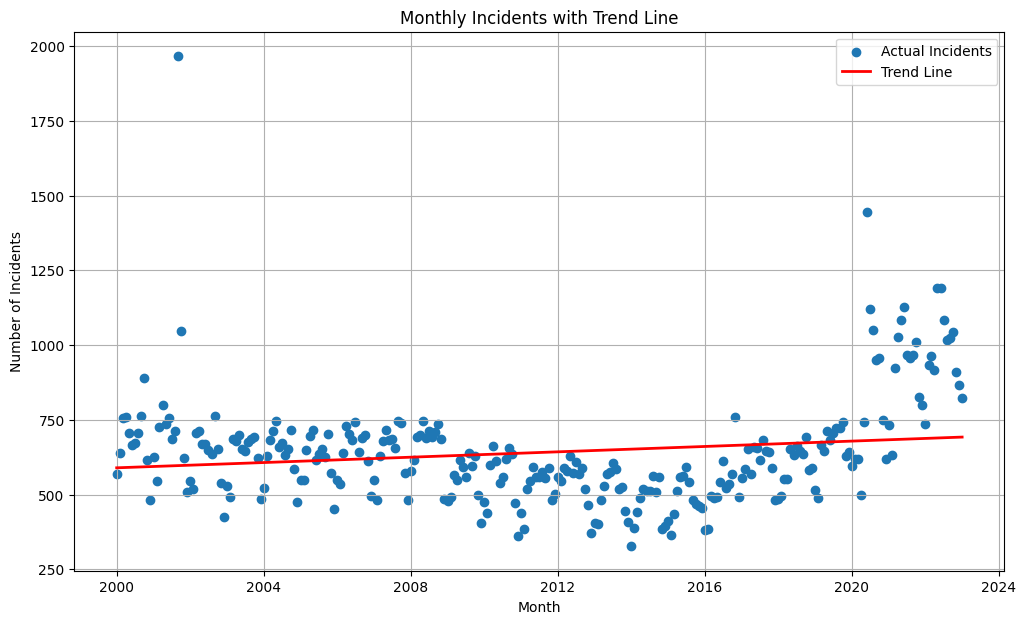

In [162]:
import numpy as np
data = {
    'Month' : ts.index,
    'Incidents': ts.values
}

df = pd.DataFrame(data)

df['Month_dt'] = pd.to_datetime(df['Month'])

df['Month_num'] = (df['Month_dt'] - df['Month_dt'].min()).dt.days // 30

x_numeric = df['Month_num']
y = df['Incidents']
coeffs = np.polyfit(x_numeric, y, 1)
m = coeffs[0]
b = coeffs[1]
best_fit_line = m * x_numeric + b

plt.figure(figsize=(12, 7))
plt.scatter(df['Month_dt'], y, label='Actual Incidents')
plt.plot(df['Month_dt'], best_fit_line, color='red', linewidth=2, label='Trend Line')

plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('Monthly Incidents with Trend Line')
plt.legend()
plt.grid(True)
plt.show()

### **Distribution of Hate Crime Bias Motivations**  
This dataset contained the number of hate crime incidents for each bias section, which are listed below. The bias motivation is a categorical variable with multiple different sections and the pie chart below represents how they are distributed. These biases are the only feature of this dataset and the entries are the total incident count per category from 2000-2023. After creating the pie chart, it is clear that the category of Race/Ethnicity/Ancestry dominates hate crime motivations, accounting for 61.4% of all incidents alone. 

**Hypotheses**  
Null Hypothesis - H0: All k bias categories are equally likely. 

Alternative Hypothesis - Ha: All k bias categories are not equally likely. 

I will use the following significance level: $\alpha$ = .05

**Primary Analysis Technique**

I will use a Chi-Square Goodness-of-fit Test to determine the solution. This testing method is helpful in this case as it can determine how the observed distribution matches with the expected distribution. 

First, I will display the distribution of hate-crime bias motivations. 

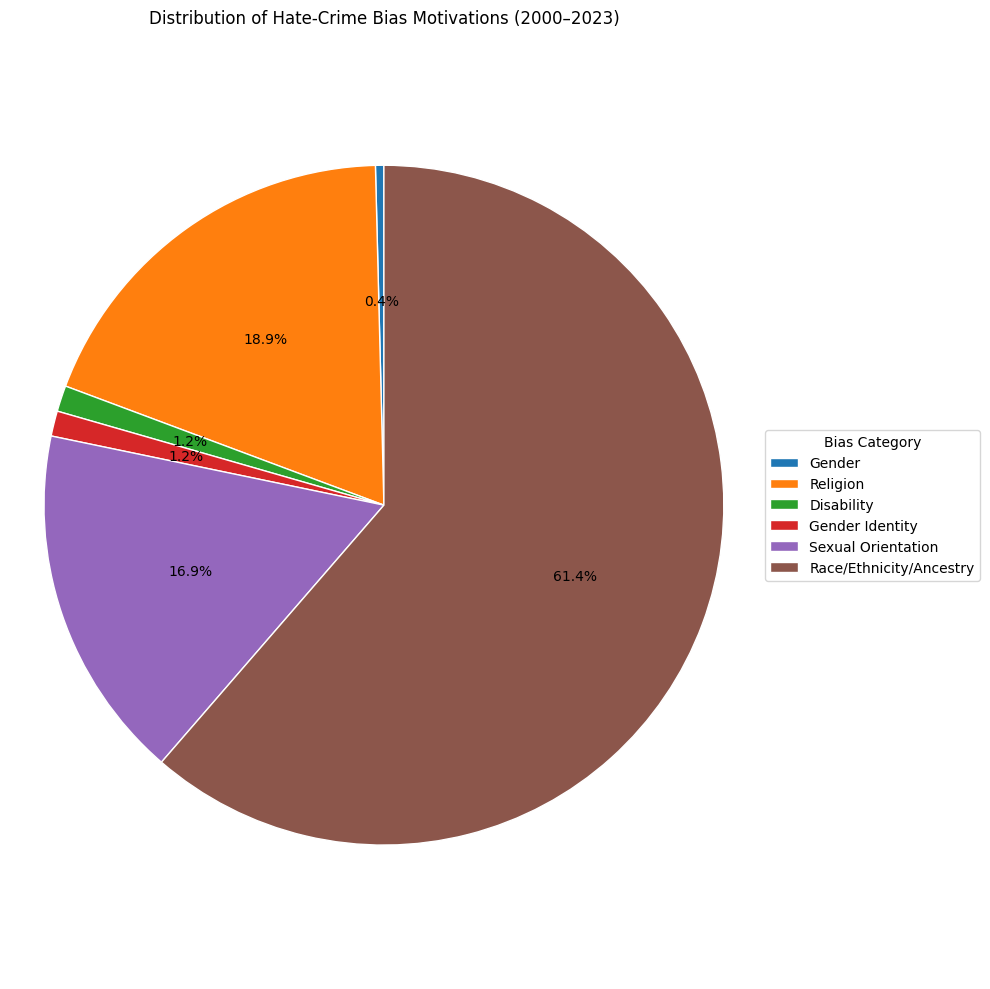

In [163]:
fig, ax = plt.subplots(figsize=(10,10))
wedges, texts, autotexts = ax.pie(
    bias_series.values,
    startangle=90,
    wedgeprops={'linewidth':1, 'edgecolor':'white'},
    autopct='%1.1f%%',
)

ax.legend(
    bias_series.index,
    title="Bias Category",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.4, 1),
)

ax.set_title('Distribution of Hate-Crime Bias Motivations (2000–2023)')
ax.axis('equal')
plt.tight_layout()
plt.show()

Now, I will use the Chi-Square Goodness-of-Fit Test to analyze the distribution. 

In [164]:
from scipy.stats import chisquare

observed = bias_series.values

# Test against a uniform null (all categories equally likely)
chi2, p = chisquare(f_obs=observed)
print(f"χ² = {chi2:.2f}, p-value = {p:.3f}")

χ² = 295350.99, p-value = 0.000


Using the Chi-Square Goodness-of-Fit Test displays X^2, which compares observed frequencies with expected frequencies. Our null hypothesis was that the data had an equal distribution among bias categories. However, the large X^2 value indicates a greater discrepancy between observed and expected frequencies. Also, the p-value is shown to be 0. Therefore, we reject the null hypothesis and conclude that all bias categories are not equally likely. 

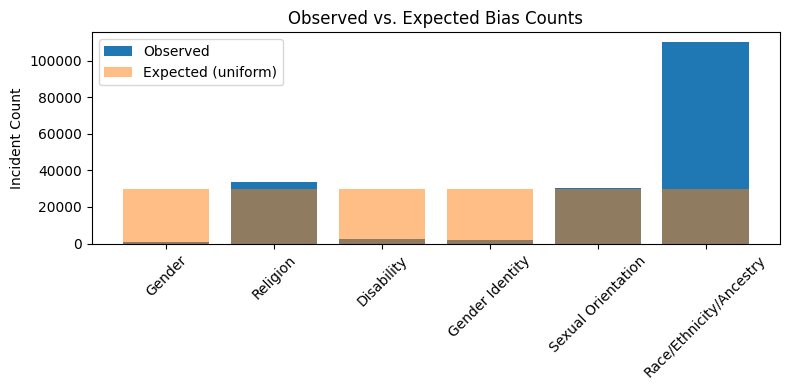

In [165]:
total = bias_series.sum()
K     = len(bias_series)
expected = [total / K] * K

plt.figure(figsize=(8,4))
x = range(K)
plt.bar(x, bias_series.values, label='Observed')
plt.bar(x, expected,   alpha=0.5, label='Expected (uniform)')
plt.xticks(x, bias_series.index, rotation=45)
plt.ylabel('Incident Count')
plt.title('Observed vs. Expected Bias Counts')
plt.legend()
plt.tight_layout()
plt.show()

This bar graph portrays the results we got from above. As you can see, race/ethnicity bias vastly exceeds the uniform baseline while the other categories fall well short. This further displays the X^2 value determined above. 

### **Hate Crime Incidents by Location Type**  
This dataset was the same as the last one, but this time I have extracted the locations of these hate crime incidents. The main characteristics of this dataset are the location types and the incident count for each location. Location type is a single categorical feature and we have one total  incident count per category covering all hate crime reports from 2000 - 2023. After reviewing the data, it is clear that 'Home/Residence' leads the location types with over 50,000 hate crime incidents. 

**Hypotheses**   
Null Hypothesis - H0: The proportion of all hate-crime incidents occuring at residence/homes is equal to all other categories. 

Alternative Hypothesis - Ha: Residence/homes account for a greater share of hate-crime incidents that other categories. 

I will use the following significance level: $\alpha$ = .05

**Primary Analysis Technique**

I will use a one sample proportion z-test to determine. This testing method is helpful in this case as it can determine if theres a significant deference between the sample proportions. 



First, I will display the Hate-Crime Incidents by Location Type. 

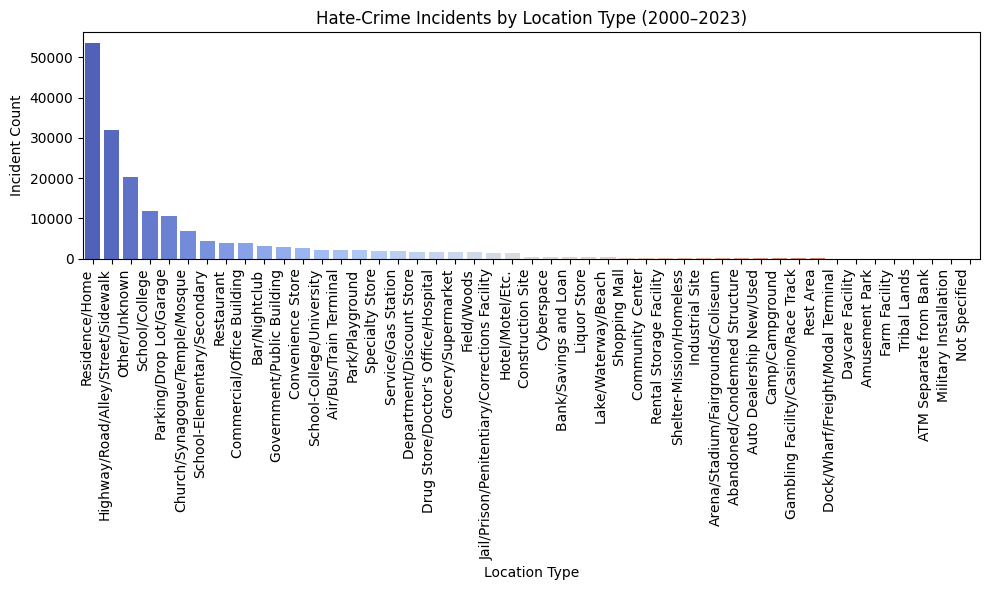

In [166]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=loc_series.index,
    hue=loc_series.index,
    y=loc_series.values,
    palette='coolwarm',
)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Location Type')
plt.ylabel('Incident Count')
plt.title('Hate-Crime Incidents by Location Type (2000–2023)')
plt.tight_layout()
plt.show()

Now, I will use the one sample proportion z-test to analyze the distribution. 

In [167]:
from statsmodels.stats.proportion import proportions_ztest

count  = loc_series['Residence/Home']   # number of “successes”
nobs   = loc_series.sum()              # total trials
value  = 0.5                           # null hypothesis proportion

z_stat, p_value = proportions_ztest(count=count, nobs=nobs, value=value)
print(f"z = {z_stat:.3f}, p = {p_value:.3f}")

z = -186.922, p = 0.000


Using a one sample proportion test, we get a z-value that indicates how far away the observed sample proportion is from what is expected based on the null hypothesis. Based on the null hypothesis, we expected that the proportion of hate-crimes occuring at residence/homes is equal to all other categories. However, the large z-value suggests that the sample proportion is significantly different than what was hypothesized. Also, the p-value is 0 which is less than our significance value, so we reject the null hypothesis and conclude that residence/homes account for a greater share of hate-crime incidents than other categories. 

# Insights and Conclusions
## Key Findings
**Overall Trend - U.S. Hate-Crime Incidents Have Risen Since 2000**  
Linear regression reveals a modest but steady increase in monthly hate-crime incidents since 2000, about 3 additional incidents per year, confirming this remains a growing concern.

**Bias Motivations - Hate Crimes Based on Race Occurs More Than Other Biases**  
Race-based motivations (for example, anti-Black and anti-Asian) account for over 60% of reported incidents. Religious biases (especially anti-Jewish and anti-Muslim) and gender/sexual-orientation biases also rank highly among the categories.

**Location Types - Most Hate Crimes Occur at Home**    
Most incidents occur in residential settings and along roadways, with schools and religious institutions emerging as significant hotspots, as well.


#### Using the datasets from the FBI Hate Crime database, I was able to determine the trends in hate-crime incidents in the United States. First, I used the total count of hate-crime incidents over the past two decades to understand how the overall national rate has evolved, fitting a simple linear regression that revealed a modest but statistically significant upward trend. Next, I broke the data down by bias motivation, which includes race, religion, and other categories. Using a chi-square goodness-of-fit test determined that these motivations are far from equally distributed and that race is the leading bias motivation of hate crimes. Finally, I examined the distribution of hate-crime incidents by location types including homes, schools, and other settings. Using a one sample proportion test z-test demonstrated that residential incidents occur at a significantly increased rate than all other categories. Altogether, this comprehensive, data-driven approach that combines trend modeling, bias and location-based analyses provides actionable insights to guide policies and outreach for reducing hate crime across the United States.